In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal

In [2]:
params = {
    # exp
    "seed": 0,
    "runs": 2,
    "exp_name": "split_test",
    "split": "random_split", #CV
    "test_split": 0.3,
    "calib_split": 0.1,

    "cv_folds": 5,
    "plot": True,
    "calib_methods": ["RF", "DT"], #, "RF_ens_k", "RF_ens_r", "Platt", "ISO", "Beta", "CRF", "VA"],
    
    "metrics": ["acc", "ece", "logloss", "tce", "BS", "BS2", "CL", "GL", "IL"], 

    #data
    "data_name": "synthetic",
    "plot_data": True,
    "data_size": 100,
    "n_copy": 10,
    "n_features": 20,
    "n_informative": 15, 
    "n_redundant": 5, 
    "n_repeated": 0, 

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 


    # calib param
    "bin_strategy": "uniform",
    "ece_bins": 20,
    "boot_size": 1000,
    "boot_count": 5,

    # RF hyper opt
    "hyper_opt": "Manual", #"Default", "Manual"
    "opt_cv":5, 
    "opt_n_iter":10,
    "opt_top_K": 5,
    "search_space": {
                    "n_estimators": [100],
                    "max_depth": [2,3,4,5,6,7,8,10,15,20,30,40,50,60,100],
                    "criterion": ["gini", "entropy"],
                    "max_features": ["sqrt", "log2"],
                    "min_samples_split": [2,3,4,5],
                    "min_samples_leaf": [1,2,3],
                    "oob_score": [True]
                    },

    # "depth": 4,
    "oob": True,
    "n_estimators": 100,

}

exp_key = "depth"
# exp_values = [2,3,4,5,10,15,20, 25, 30, 35, 40, 45, 50]
exp_values = [2,3,4]

In [3]:
calib_results_dict, data_list = cx.run_exp(exp_key, exp_values, params)
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

TypeError: list indices must be integers or slices, not str

In [ ]:
tables["tce"]

,RF,RF_ens_k,RF_ens_r,Platt,ISO,Beta,CRF,VA
Data,,,,,,,,
2,0.068800,0.027512,0.068820,0.046538,0.043798,0.046122,0.056270,0.044238
3,0.052291,0.027512,0.051811,0.032187,0.031574,0.032145,0.041366,0.031756
4,0.036408,0.027512,0.035938,0.022171,0.022889,0.022318,0.028786,0.023214
5,0.023664,0.027512,0.023348,0.016202,0.017778,0.016782,0.019969,0.018178
10,0.006699,0.027512,0.006675,0.010067,0.011316,0.016888,0.006699,0.011572
15,0.007185,0.027512,0.007051,0.010126,0.010981,0.044725,0.007185,0.011122
20,0.007165,0.027512,0.007047,0.010118,0.011023,0.041607,0.007165,0.011122
Mean,0.028887,0.027512,0.028670,0.021058,0.021337,0.031512,0.023920,0.021600
Rank,5.357143,5.285714,4.428571,3.428571,3.571429,5.000000,4.357143,4.571429


In [ ]:
tables["tce_std"]

,RF_std,RF_ens_k_std,RF_ens_r_std,Platt_std,ISO_std,Beta_std,CRF_std,VA_std
Data,,,,,,,,
2,0.002695,0.001593,0.002700,0.005727,0.005981,0.005798,0.005769,0.005872
3,0.002529,0.001593,0.002532,0.003415,0.003176,0.003619,0.003636,0.003269
4,0.001995,0.001593,0.001759,0.001826,0.001617,0.001902,0.001667,0.001690
5,0.001842,0.001593,0.001594,0.001791,0.003167,0.001977,0.001887,0.003222
10,0.001272,0.001593,0.001293,0.001185,0.000655,0.005459,0.001272,0.000521
15,0.001543,0.001593,0.001524,0.001131,0.000536,0.003242,0.001543,0.000562
20,0.001545,0.001593,0.001525,0.001119,0.000523,0.003497,0.001545,0.000609


In [ ]:
column_names = tables["tce"].columns.tolist()
temp = tables["tce_std"]
temp.columns = column_names
df1_str = tables["tce"].round(4).astype(str)
df2_str = temp.round(4).astype(str)
res = df1_str + "±" + df2_str
res

,RF,RF_ens_k,RF_ens_r,Platt,ISO,Beta,CRF,VA
Data,,,,,,,,
2,0.0688±0.0027,0.0275±0.0016,0.0688±0.0027,0.0465±0.0057,0.0438±0.006,0.0461±0.0058,0.0563±0.0058,0.0442±0.0059
3,0.0523±0.0025,0.0275±0.0016,0.0518±0.0025,0.0322±0.0034,0.0316±0.0032,0.0321±0.0036,0.0414±0.0036,0.0318±0.0033
4,0.0364±0.002,0.0275±0.0016,0.0359±0.0018,0.0222±0.0018,0.0229±0.0016,0.0223±0.0019,0.0288±0.0017,0.0232±0.0017
5,0.0237±0.0018,0.0275±0.0016,0.0233±0.0016,0.0162±0.0018,0.0178±0.0032,0.0168±0.002,0.02±0.0019,0.0182±0.0032
10,0.0067±0.0013,0.0275±0.0016,0.0067±0.0013,0.0101±0.0012,0.0113±0.0007,0.0169±0.0055,0.0067±0.0013,0.0116±0.0005
15,0.0072±0.0015,0.0275±0.0016,0.0071±0.0015,0.0101±0.0011,0.011±0.0005,0.0447±0.0032,0.0072±0.0015,0.0111±0.0006
20,0.0072±0.0015,0.0275±0.0016,0.007±0.0015,0.0101±0.0011,0.011±0.0005,0.0416±0.0035,0.0072±0.0015,0.0111±0.0006
Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tables["CL"]

,RF,RF_ens_k,RF_ens_r,Platt,ISO,Beta,CRF,VA
Data,,,,,,,,
2,0.068800,0.027512,0.068820,0.046538,0.007346,0.046122,0.056270,0.008932
3,0.052291,0.027512,0.051811,0.032187,0.004723,0.032145,0.041366,0.007576
4,0.036408,0.027512,0.035938,0.022171,0.005186,0.022318,0.028786,0.007266
5,0.023664,0.027512,0.023348,0.016202,0.005114,0.016782,0.019969,0.007189
10,0.006699,0.027512,0.006675,0.010067,0.003554,0.016888,0.006699,0.005645
15,0.006564,0.027512,0.006947,0.010022,0.003612,0.044323,0.006564,0.004495
20,0.006377,0.027512,0.006637,0.009964,0.003874,0.041125,0.006377,0.004689
Mean,0.028686,0.027512,0.028596,0.021021,0.004773,0.031386,0.023719,0.006542
Rank,3.071429,3.142857,3.142857,4.142857,8.000000,3.428571,4.071429,7.000000


In [ ]:
tables["ece"]

,RF,RF_ens_k,RF_ens_r,Platt,ISO,Beta,CRF,VA
Data,,,,,,,,
2,0.036629,0.019626,0.039998,0.020897,0.034381,0.022780,0.024368,0.045581
3,0.031463,0.019626,0.032154,0.025663,0.020973,0.024518,0.027805,0.025555
4,0.027324,0.019626,0.026620,0.026825,0.038946,0.025624,0.027392,0.043505
5,0.022602,0.019626,0.017446,0.028395,0.026680,0.027447,0.030918,0.033108
10,0.035733,0.019626,0.048216,0.024850,0.022722,0.026234,0.035733,0.030249
15,0.038087,0.019626,0.042470,0.032806,0.030206,0.053654,0.038087,0.031369
20,0.038626,0.019626,0.041233,0.030820,0.034876,0.053968,0.038626,0.037167
Mean,0.032923,0.019626,0.035448,0.027179,0.029826,0.033461,0.031847,0.035219
Rank,5.571429,1.142857,5.857143,3.714286,3.571429,4.714286,5.714286,5.714286


In [ ]:
import scipy.stats as stats
import numpy as np

tce_ranks = np.array(tables["tce"].loc["Rank"])
ece_ranks = np.array(tables["ece"].loc["Rank"])
brier_ranks = np.array(tables["BS"].loc["Rank"])
logloss_ranks = np.array(tables["logloss"].loc["Rank"])
acc_ranks = np.array(tables["acc"].loc["Rank"])

tau, p_value = stats.kendalltau(tce_ranks, brier_ranks)
print(f"tau {tau} p_value {p_value}")

tau -0.9999999999999998 p_value 4.96031746031746e-05


In [ ]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF', 'RF_ens_k', 'RF_ens_r', 'Platt', 'ISO', 'Beta', 'CRF', 'VA']

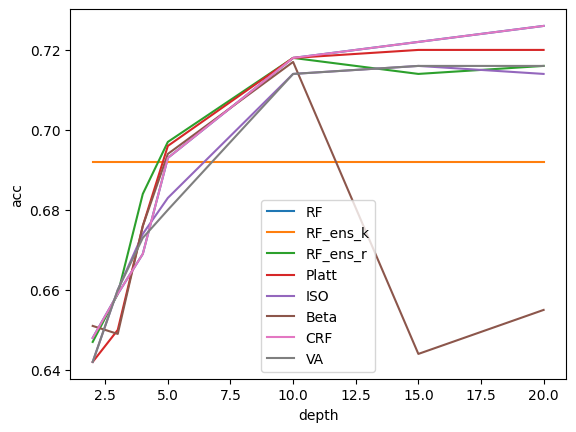

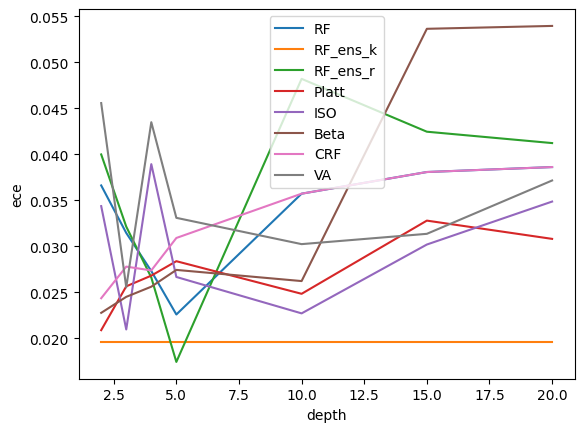

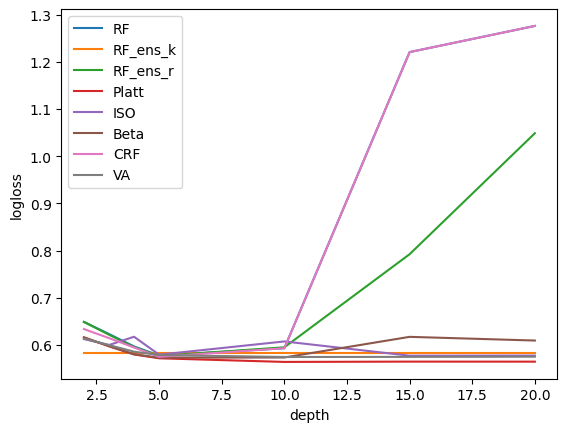

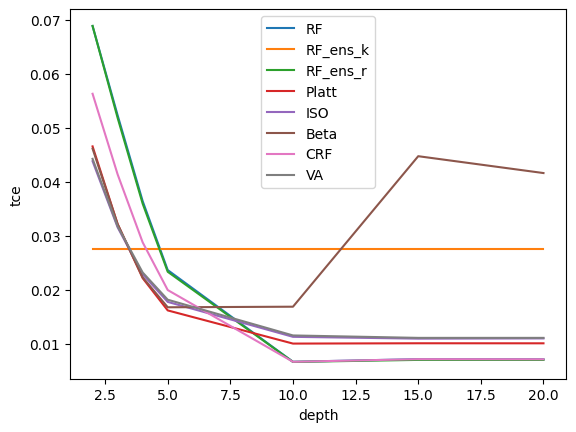

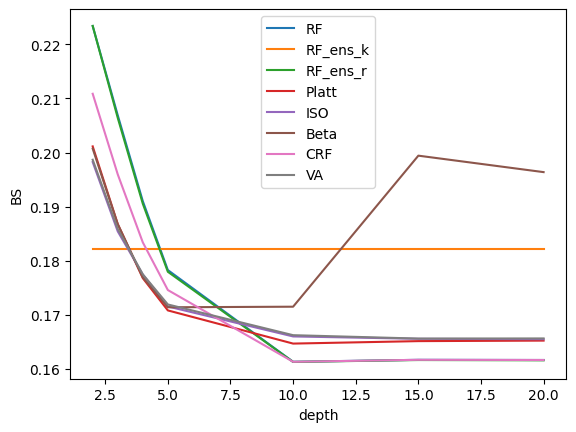

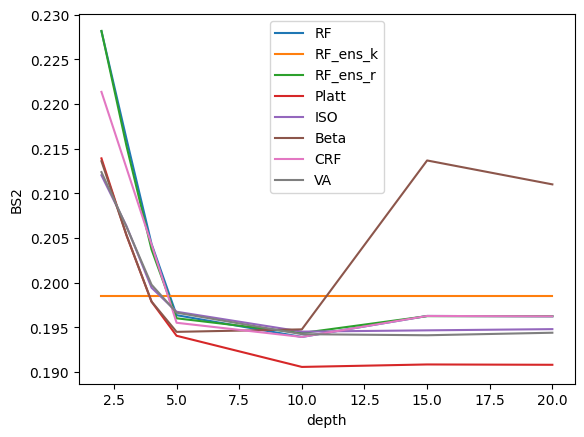

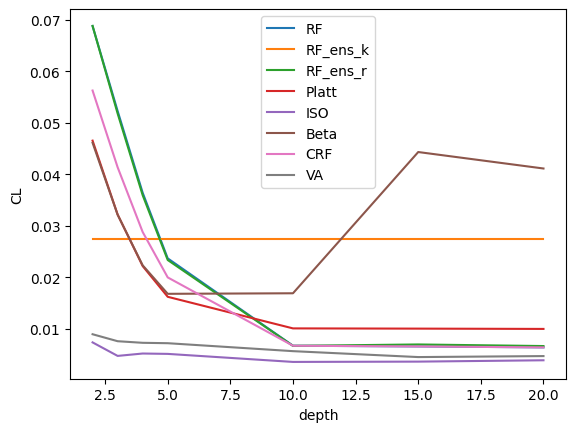

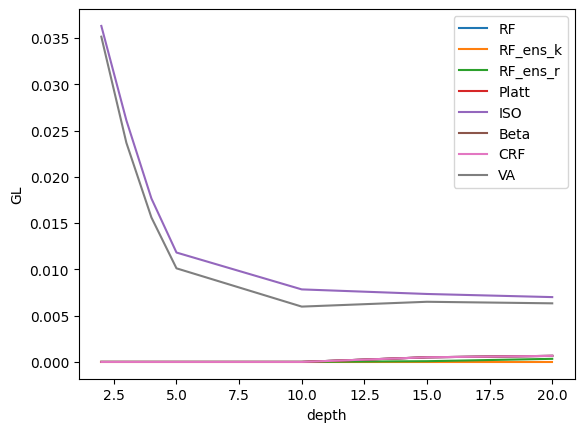

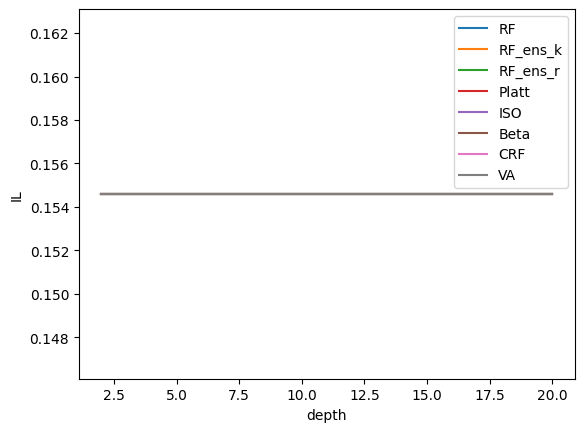

In [ ]:
tables_plot = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)
for metric in params["metrics"]:
    ax = tables_plot[metric][plot_calib_methods].plot()
    ax.set_xlabel(exp_key)
    ax.set_ylabel(metric)